In [13]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

df = pd.read_csv("/content/Correct.csv")

df['tokens'] = df['review'].apply(lambda x: word_tokenize(x, language='english'))

In [20]:
df["tokens"] = df["tokens"].apply(remove_stopwords)

In [18]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [17]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

df = pd.read_csv("/content/Correct.csv")

df['tokens'] = df['review'].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [16]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [12]:
df

,Unnamed: 0,review,sentiment
0,0,one of the other reviewers has mentioned that ...,positive
1,1,a wonderful little production the filming tech...,positive
2,2,i thought this was a wonderful way to spend ti...,positive
3,3,basically there is a family where a little boy...,negative
4,4,petter matteis love in the time of money is a ...,positive
...,...,...,...
9995,9995,fun entertaining movie about wwii german spy j...,positive
9996,9996,give me a break how can anyone say that this i...,negative
9997,9997,this movie is a bad movie but after watching a...,negative
9998,9998,this is a movie that was probably made to ente...,negative


In [7]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [28]:
from nltk.corpus import stopwords
# stopwords.words("english")


In [9]:
def remove_stopwords(text):
  L=[]
  for i in text:
    if i not in stopwords.words("english"):
      L.append(i)

  return L

In [21]:
# df["tokens"].apply(remove_stopwords)

In [ ]:
# df["tokens"] = df["tokens"].apply(remove_stopwords)

In [ ]:
df

In [22]:

df["review"] = df["tokens"].apply(lambda x : " ".join(x))


In [23]:
df.head(4)

,Unnamed: 0,review,sentiment,tokens
0,0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn..."
2,2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,3,basically family little boy jake thinks zombie...,negative,"[basically, family, little, boy, jake, thinks,..."


In [24]:

df["character_len"] = df["review"].str.len()
df["words_len"] = df["tokens"].str.len()


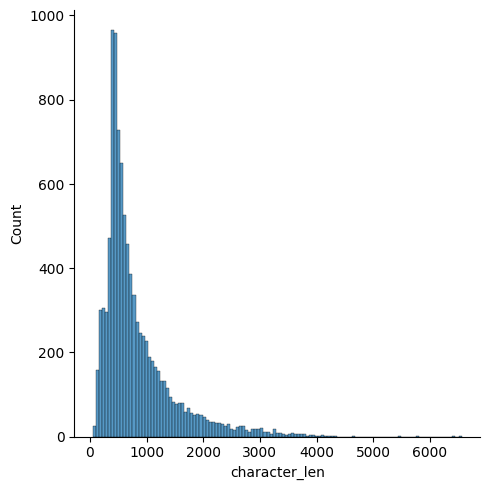

In [25]:

import seaborn as sns
sns.displot(df["character_len"])

# means max len review range between 1000 se 3000 k beech


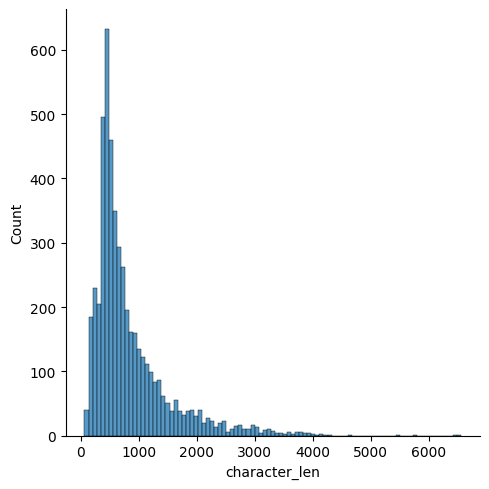

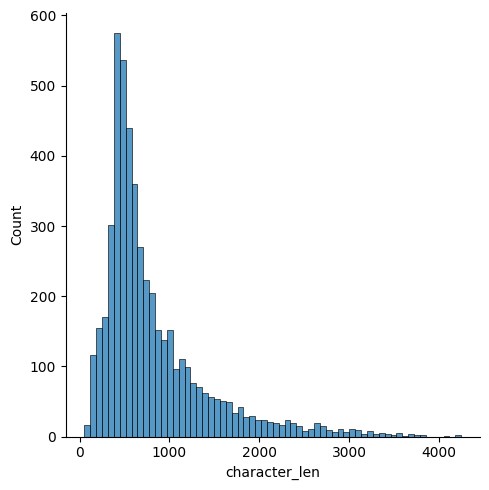

In [26]:
sns.displot(df[df["sentiment"] == "positive"]["character_len"])
sns.displot(df[df["sentiment"] == "negative"]["character_len"])

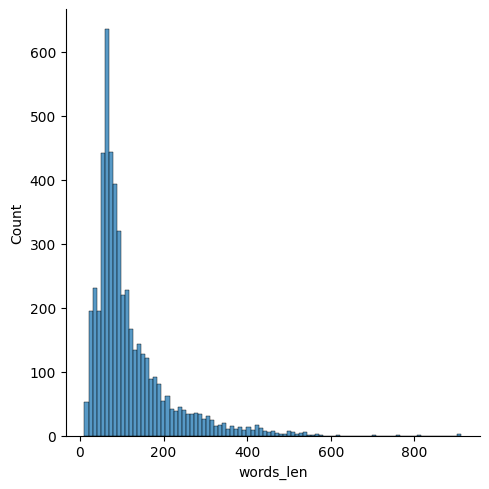

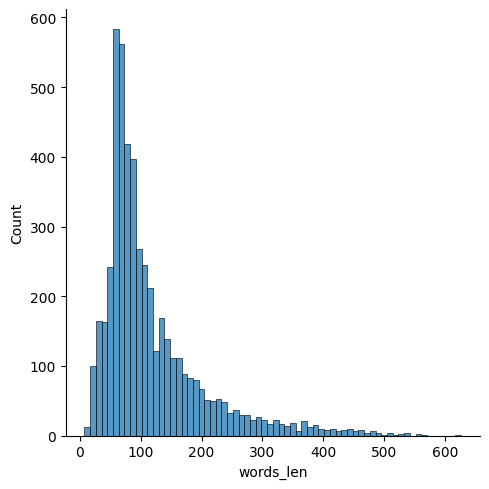

In [27]:
sns.displot(df[df["sentiment"] == "positive"]["words_len"])
sns.displot(df[df["sentiment"] == "negative"]["words_len"])

In [33]:
#  common bograms counts

from nltk import ngrams

pd.Series(ngrams(df["tokens"].sum(),2)).value_counts()


,count
"(I, would)",492
"(ever, seen)",460
"(special, effects)",438
"(I, seen)",429
"(even, though)",372
...,...
"(overtone, rarely)",1
"(hazy, overtone)",1
"(surreal, hazy)",1
"(essence, surreal)",1


In [34]:
#  common trigrams counts

from nltk import ngrams

pd.Series(ngrams(df["tokens"].sum(),3)).value_counts()


,count
"(I, ever, seen)",170
"(worst, movie, ever)",69
"(I, would, like)",56
"(movie, ever, seen)",56
"(one, worst, movies)",55
...,...
"(tough, issues, reviewer)",1
"(deals, tough, issues)",1
"(well, deals, tough)",1
"(traditionally, well, deals)",1


In [36]:
pip install wordcloud matplotlib

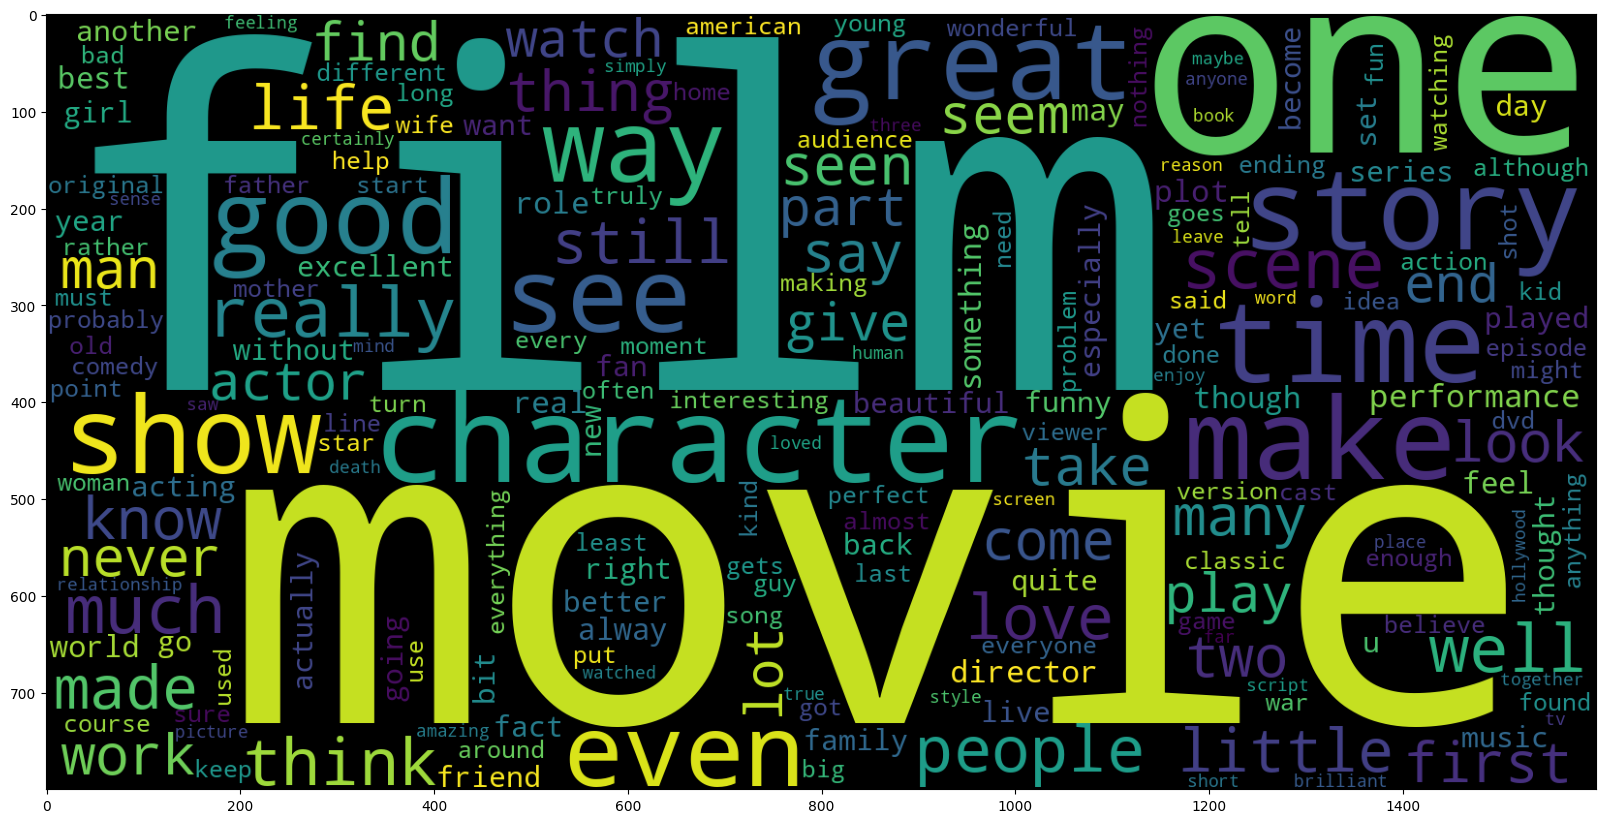

In [37]:
# wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))  # Positive Review Text
wc = WordCloud(width=1600, height=800).generate(" ".join(df[df['sentiment'] == "positive"]["review"]))
plt.imshow(wc)


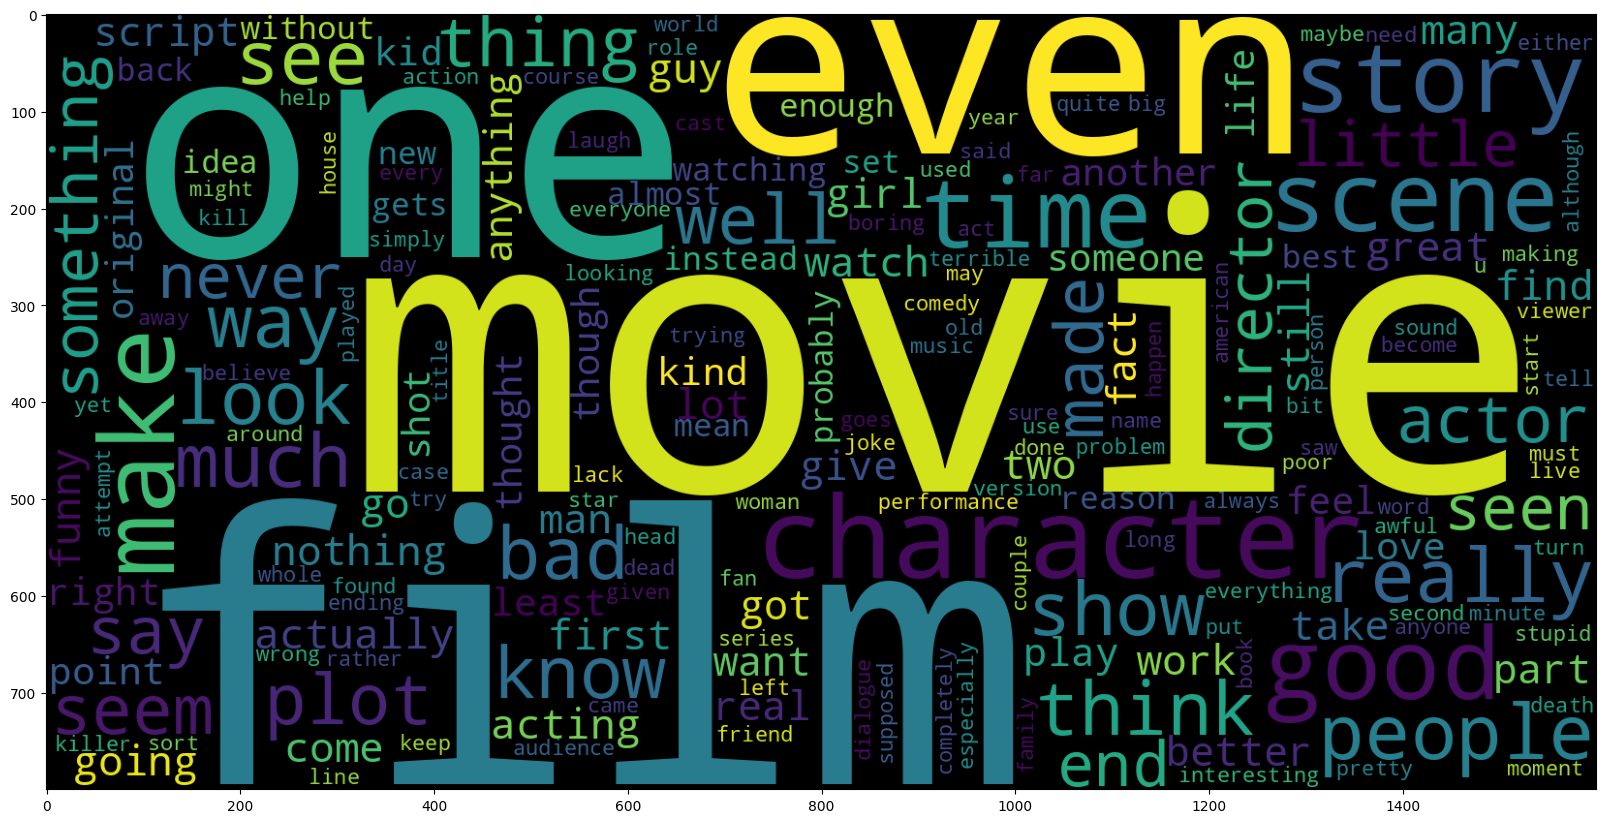

In [38]:
# wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))  # Positive Review Text
wc = WordCloud(width=1600, height=800).generate(" ".join(df[df['sentiment'] == "negative"]["review"]))
plt.imshow(wc)


**Vectorisation using BOW**

In [44]:

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd  # Make sure pandas is imported

#here feature = words kitne words lena chate ho in a bag
# ngram is unigram , bigram or tigram whatever.

count_vectorizer = CountVectorizer(max_features=5000 , ngram_range=(1,3))
bag_of_words = count_vectorizer.fit_transform(df['review'])
bag_of_words = pd.DataFrame(bag_of_words.toarray(), columns=count_vectorizer.get_feature_names_out())



In [45]:
bag_of_words

,10,10 10,10 minutes,10 years,100,1010,11,110,12,13,...,young girl,young man,young people,young woman,younger,youth,zero,zombie,zombies,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now From here the code will go to data science team for analysics and ml tranining

**Additionals**

In [50]:

# PCA = High dimension ko low dimension me lata h


In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(bag_of_words.values)


In [49]:
pca_result.shape

(10000, 2)

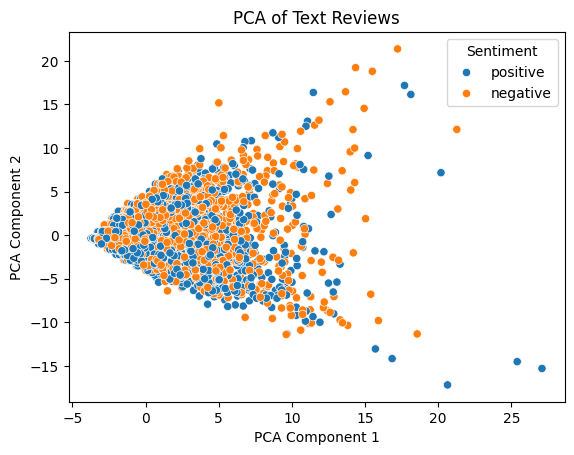

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df["sentiment"])
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA of Text Reviews")
plt.legend(title="Sentiment")
plt.show()
